# T43: CompiledRHGCanvas の可視化
Matplotlib/Plotly で multi-layer の compiled キャンバスを俯瞰表示する。

In [ ]:
import pathlib
import sys


from lspattern.blocks.pipes.memory import MemoryPipeSkeleton
from lspattern.blocks.cubes.initialize import InitPlusCubeSkeleton
from lspattern.blocks.cubes.memory import MemoryCubeSkeleton
from lspattern.canvas import CompiledRHGCanvas, RHGCanvas, RHGCanvasSkeleton
from lspattern.mytype import PatchCoordGlobal3D

# %%
d = 3
r = 3


canvass = RHGCanvasSkeleton("Memory X")

edgespec = {"LEFT": "X", "RIGHT": "X", "TOP": "Z", "BOTTOM": "Z"}
edgespec_trimmed = {"LEFT": "O", "RIGHT": "O", "TOP": "O", "BOTTOM": "O"}
# tmpl = RotatedPlanarTemplate(d=3, edgespec=edgespec)
# _ = tmpl.to_tiling()
blocks = [
    (
        PatchCoordGlobal3D((0, 0, 0)),
        InitPlusCubeSkeleton(d=3, edgespec=edgespec),
    ),  # check1: Temporal Pipe
    (
        PatchCoordGlobal3D((0, 0, 1)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec),
    ),  # Check1: Temporal Pipe
    (
        PatchCoordGlobal3D((3, 3, 0)),
        InitPlusCubeSkeleton(d=3, edgespec=edgespec),
    ),  # check2: Initialization at different xy
    (
        PatchCoordGlobal3D((2, 2, 1)),
        InitPlusCubeSkeleton(d=3, edgespec=edgespec_trimmed),
    ),  # Check3: Trimmed edgespec and initialize at t > 0
    (
        PatchCoordGlobal3D((4, 4, 0)),
        InitPlusCubeSkeleton(d=3, edgespec=edgespec),
    ),  # Check4: Initialize but no pipe
    (
        PatchCoordGlobal3D((4, 4, 1)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec),
    ),  # Check4: Initialize but no pipe
    (
        PatchCoordGlobal3D((4, 4, 2)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec),
    ),  # Check4: Initialize but no pipe
]
pipes = [
    (
        PatchCoordGlobal3D((0, 0, 0)),
        PatchCoordGlobal3D((0, 0, 1)),
        MemoryPipeSkeleton(d=3, edgespec=edgespec),
    )
]
# pipes = []

for block in blocks:
    # RHGCanvasSkeleton は skeleton を受け取り、to_canvas() で block 化します
    canvass.add_cube(*block)
for pipe in pipes:
    canvass.add_pipe(*pipe)

canvas = canvass.to_canvas()

compiled_canvas: CompiledRHGCanvas = canvas.compile()
nnodes = (
    len(getattr(compiled_canvas.global_graph, "physical_nodes", []) or [])
    if compiled_canvas.global_graph
    else 0
)
nedges = (
    len(getattr(compiled_canvas.global_graph, "physical_edges", []) or [])
    if compiled_canvas.global_graph
    else 0
)
print(
    {
        "layers": len(compiled_canvas.layers),
        "nodes": nnodes,
        "edges": nedges,
        "coord_map": len(compiled_canvas.coord2node),
    }
)

graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
cgraph before remap
{(0, 0, 0): InitPlus(d=3, edge_spec={'LEFT': 'X', 'RIGHT': 'X', 'TOP': 'Z', 'BOTTOM': 'Z'}, source=(0, 0, 0), sink=None, template=RotatedPlanarCubeTemplate(id_=1, data_coords=[(0, 0), (2, 0), (4, 0), (0, 2), (2, 2), (4, 2), (0, 4), (2, 4), (4, 4)], coord2qubitindex={}, coord2id={}, x_coords=[(-1, 1), (3, 1), (1, 3), (5, 3)], z_coords=[(3, -1), (1, 1), (3, 3), (1, 5)], d=3, edgespec={'LEFT': 'X', 'RIGHT': 'X', 'TOP': 'Z', 'BOTTOM': '

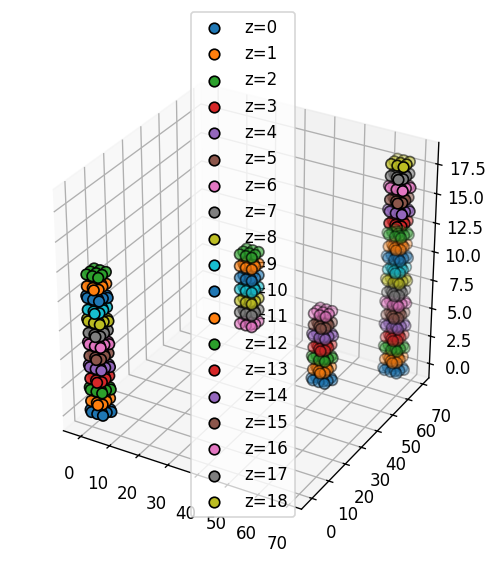

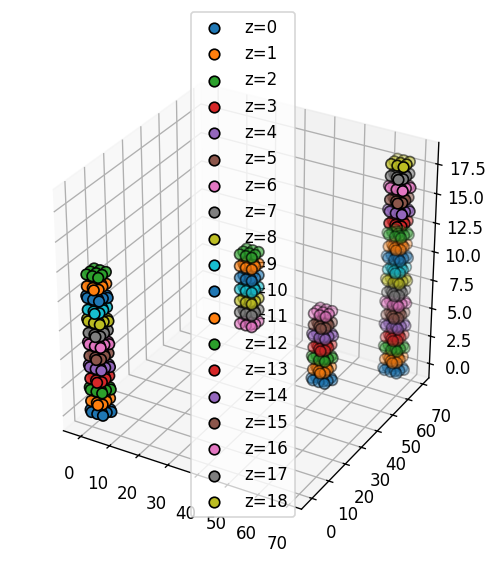

In [2]:
from lspattern.visualizers import visualize_compiled_canvas
fig = visualize_compiled_canvas(compiled_canvas, show=True, show_edges=True)
fig

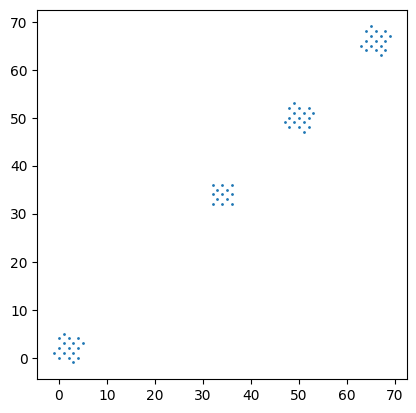

In [3]:
import matplotlib.pyplot as plt

vals = compiled_canvas.coord2node
vals2d = set((x, y) for (x, y, z) in vals.keys())
plt.scatter(*[list(t) for t in zip(*vals2d)], s=1)
plt.gca().set_aspect("equal", "box")
plt.show()

In [4]:
from lspattern.visualizers import visualize_compiled_canvas_plotly
fig3d = visualize_compiled_canvas_plotly(compiled_canvas, show_edges=True)
fig3d.show()